In [8]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join,QTable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
import seaborn as sns
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord, angular_separation

In [2]:
# Check number density of random galaxies
G09_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g09randisprimcorrect.fits')
G12_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g12randisprimcorrect.fits')
G15_rands = Table.read('/suphys/fscu5535/HSC_work/mod_data/g15randisprimcorrect.fits')

G09_rands.info()
G12_rands.info()
G15_rands.info()

<Table length=31754215>
      name        dtype 
---------------- -------
       object_id   int64
object_id_isnull    bool
              ra float64
       ra_isnull    bool
             dec float64
      dec_isnull    bool
          ra_rad float64
         dec_rad float64
<Table length=26716610>
      name        dtype 
---------------- -------
       object_id   int64
object_id_isnull    bool
              ra float64
       ra_isnull    bool
             dec float64
      dec_isnull    bool
          ra_rad float64
         dec_rad float64
<Table length=22438093>
      name        dtype 
---------------- -------
       object_id   int64
object_id_isnull    bool
              ra float64
       ra_isnull    bool
             dec float64
      dec_isnull    bool
          ra_rad float64
         dec_rad float64


Text(0.5, 1.0, 'G15')

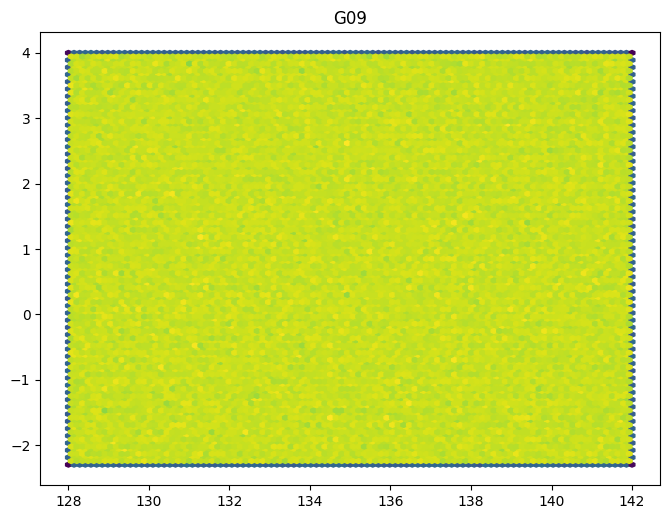

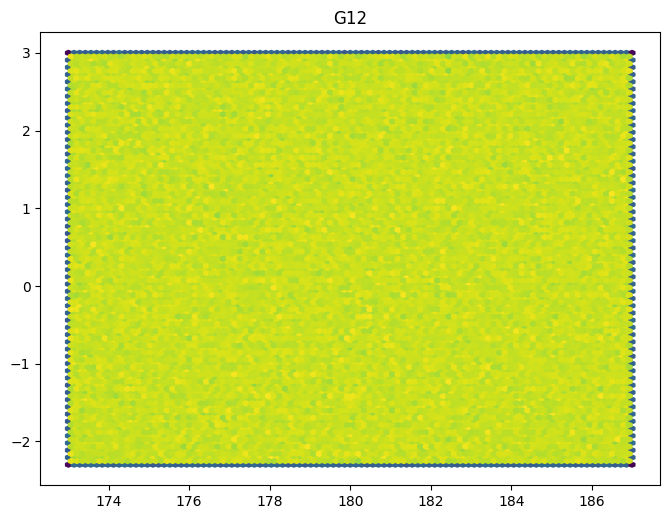

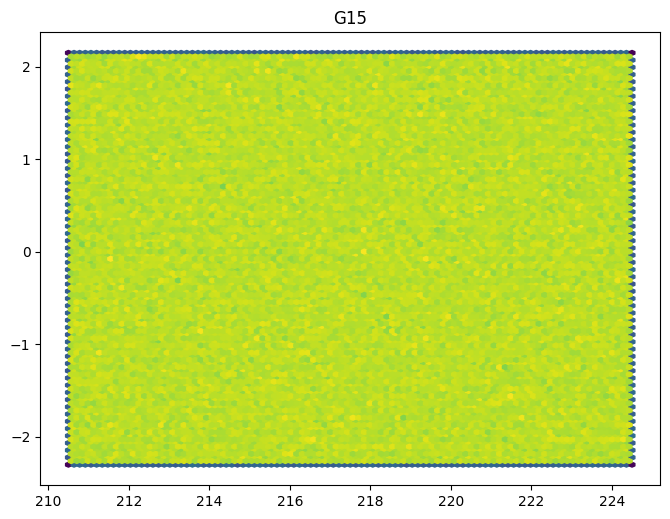

In [3]:
plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(G09_rands['ra'],G09_rands['dec'])
plt.title("G09")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(G12_rands['ra'],G12_rands['dec'])
plt.title("G12")

plt.figure(figsize=(8,6),dpi=100)
plt.hexbin(G15_rands['ra'],G15_rands['dec'])
plt.title("G15")

In [5]:
# so regions are nice and rectangular. Now calculate the number density of each field

G09ramax = np.max(G09_rands['ra'])
G09ramin = np.min(G09_rands['ra'])
G09decmax = np.max(G09_rands['dec'])
G09decmin = np.min(G09_rands['dec'])
G09area = (G09ramax-G09ramin)*(G09decmax-G09decmin)
G09count = len(G09_rands)

print("G09 rands bounds")
print("RA max:",G09ramax)
print("RA min:",G09ramin)
print("Dec max:",G09decmax)
print("Dec min:",G09decmin)

print("Area:",G09area,"deg^2")
print("Total count:",len(G09_rands))
print("Number density:",G09count/G09area)





G09 rands bounds
RA max: 141.99999916410866
RA min: 128.00000030427708
Dec max: 3.999999914085134
Dec min: -2.29999952601951
Area: 88.1999849784046 deg^2
Total count: 31754215
Number density: 360025.1746956067


In [6]:
G12ramax = np.max(G12_rands['ra'])
G12ramin = np.min(G12_rands['ra'])
G12decmax = np.max(G12_rands['dec'])
G12decmin = np.min(G12_rands['dec'])
G12area = (G12ramax-G12ramin)*(G12decmax-G12decmin)
G12count = len(G12_rands)

print("G12 rands bounds")
print("RA max:",G12ramax)
print("RA min:",G12ramin)
print("Dec max:",G12decmax)
print("Dec min:",G12decmin)

print("Area:",G12area,"deg^2")
print("Total count:",len(G12_rands))
print("Number density:",G12count/G12area)

G12 rands bounds
RA max: 186.99999985337752
RA min: 173.00000018151783
Dec max: 2.9999999683338205
Dec min: -2.299999931178186
Area: 74.19999685402443 deg^2
Total count: 26716610
Number density: 360062.1446461821


In [7]:
G15ramax = np.max(G15_rands['ra'])
G15ramin = np.min(G15_rands['ra'])
G15decmax = np.max(G15_rands['dec'])
G15decmin = np.min(G15_rands['dec'])
G15area = (G15ramax-G15ramin)*(G15decmax-G15decmin)
G15count = len(G15_rands)

print("G15 rands bounds")
print("RA max:",G15ramax)
print("RA min:",G15ramin)
print("Dec max:",G15decmax)
print("Dec min:",G15decmin)

print("Area:",G15area,"deg^2")
print("Total count:",len(G15_rands))
print("Number density:",G15count/G15area)

G15 rands bounds
RA max: 224.49999960872643
RA min: 210.50000018292454
Dec max: 2.149999726753875
Dec min: -2.299999981389363
Area: 62.29999335882391 deg^2
Total count: 22438093
Number density: 360162.0448137971


In [9]:
# deload these tables
G09_rands = 0
G12_rands = 0
G15_rands = 0

In [10]:
# look at fraction of stars/gals/unknowns
# G09
G09_stars = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_stars.fits')
G09_stars.info()
G09_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_galaxies.fits')
G09_gals.info()
G09_unks = Table.read('/suphys/fscu5535/HSC_work/mod_data/G09_HSC_unknowns.fits')
G09_unks.info()



<Table length=225787>
            name             dtype     class     n_bad
--------------------------- ------- ------------ -----
                  object_id   int64 MaskedColumn     0
           object_id_isnull    bool       Column     0
                         ra float64       Column     0
                  ra_isnull    bool       Column     0
                        dec float64       Column     0
                 dec_isnull    bool       Column     0
              photoz_median float32       Column     0
       photoz_median_isnull    bool       Column     0
              i_psfflux_mag float32 MaskedColumn   534
       i_psfflux_mag_isnull    bool       Column     0
              r_psfflux_mag float32 MaskedColumn  3575
       r_psfflux_mag_isnull    bool       Column     0
             r_kronflux_mag float32 MaskedColumn  2189
      r_kronflux_mag_isnull    bool       Column     0
             i_kronflux_mag float32 MaskedColumn   768
      i_kronflux_mag_isnull    bool       C

Text(0.5, 1.0, 'G09_unks')

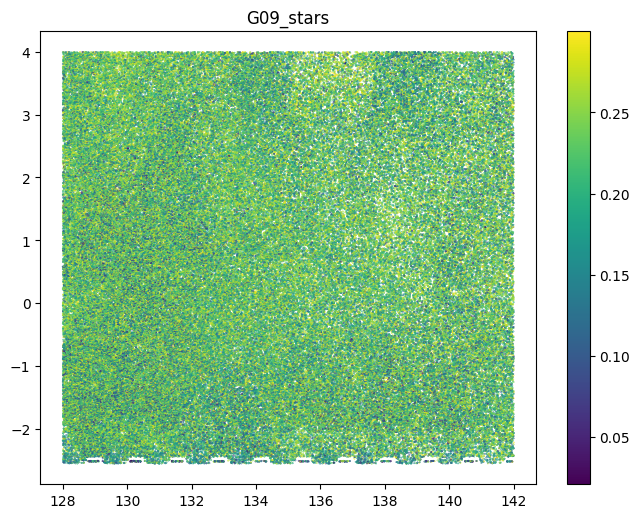

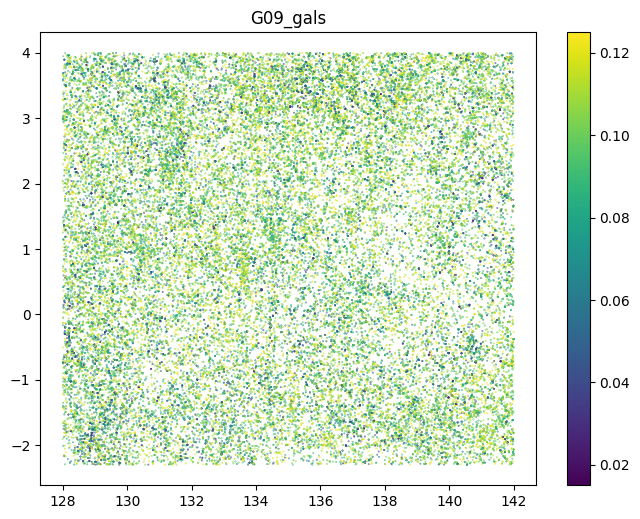

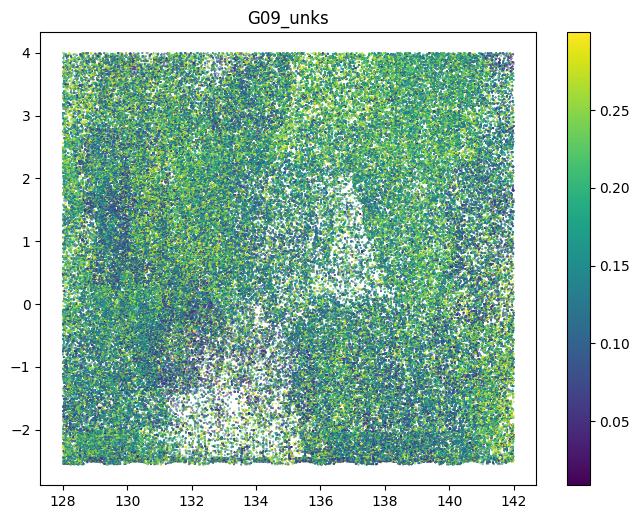

In [14]:
plt.figure(figsize=(8,6),dpi=100)
plt.scatter(G09_stars['ra'],G09_stars['dec'],c=G09_stars['photoz_median'],s=0.1)
cb = plt.colorbar()
plt.title("G09_stars")

plt.figure(figsize=(8,6),dpi=100)
plt.scatter(G09_gals['ra'],G09_gals['dec'],c=G09_gals['photoz_median'],s=0.1)
cb = plt.colorbar()
plt.title("G09_gals")


plt.figure(figsize=(8,6),dpi=100)
plt.scatter(G09_unks['ra'],G09_unks['dec'],c=G09_unks['photoz_median'],s=0.1)
cb = plt.colorbar()
plt.title("G09_unks")




In [16]:
print("stars RA min",np.min(G09_stars['ra']))
print("stars RA max",np.max(G09_stars['ra']))
print("stars dec min",np.min(G09_stars['dec']))
print("stars dec max",np.max(G09_stars['dec']))
print("stars redshift",np.max(G09_stars['photoz_median']))

print("gals RA min",np.min(G09_gals['ra']))
print("gals RA max",np.max(G09_gals['ra']))
print("gals dec min",np.min(G09_gals['dec']))
print("gals dec max",np.max(G09_gals['dec']))
print("gals redshift",np.max(G09_gals['photoz_median']))

print("unks RA min",np.min(G09_unks['ra']))
print("unks RA max",np.max(G09_unks['ra']))
print("unks dec min",np.min(G09_unks['dec']))
print("unks dec max",np.max(G09_unks['dec']))
print("unks redshift",np.max(G09_unks['photoz_median']))
      

stars RA min 128.00000799313494
stars RA max 141.9999682151174
stars dec min -2.5574059990074653
stars dec max 3.9999964028906656
stars redshift 0.29999968
gals RA min 128.0003470591094
gals RA max 141.9999484734186
gals dec min -2.299922542271126
gals dec max 3.99991845176968
gals redshift 0.12499936
unks RA min 128.0000343778859
unks RA max 141.9999165664544
unks dec min -2.5583382452572128
unks dec max 3.9998807293177285
unks redshift 0.29999968


star count: 26319
star fraction: 0.13995001595235562
gals count: 48374
gals fraction: 0.25722641710092525
unk count: 113367
unk fraction: 0.6028235669467191
[12314.     0.     0.     0.     0.  6848.     0.     0.     0.  7157.]
[88932.     0.  8311.     0.     0. 14815.     0.  1150.     0.   159.]
gals: [ 3329.     0.     0.     0.     0.  2668.     0.     0.     0. 42377.]


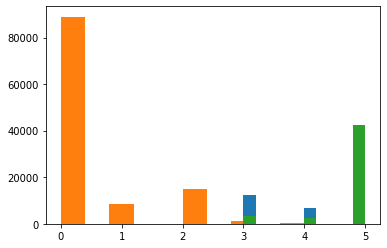

In [46]:
# count up number of stars and unks in same region as gals
starcount = 0
starfilts = []
unkcount = 0
unkfilts = []
galfilts = []

G09galramin = np.min(G09_gals['ra'])
G09galramax = np.max(G09_gals['ra'])
G09galdecmin = np.min(G09_gals['dec'])
G09galdecmax = np.max(G09_gals['dec'])
G09galzmax = np.max(G09_gals['photoz_median'])

for i in range(len(G09_stars)):
    if (G09galramin <= G09_stars['ra'][i] <= G09galramax) and (G09galdecmin <= G09_stars['dec'][i] <= G09galdecmax) and (G09_stars['photoz_median'][i] <= G09galzmax):
        starcount += 1
        filtcount = 0
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G09_stars[j][i] == 0:
                filtcount += 1
        starfilts.append(filtcount)                                         

for i in range(len(G09_unks)):
    if (G09galramin <= G09_unks['ra'][i] <= G09galramax) and (G09galdecmin <= G09_unks['dec'][i] <= G09galdecmax) and (G09_unks['photoz_median'][i] <= G09galzmax):
        unkcount += 1
        filtcount = 0      
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G09_unks[j][i] >= 0:
                filtcount += 1
        unkfilts.append(filtcount)
        
for i in range(len(G09_gals)):
        filtcount = 0
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G09_gals[j][i] == 1:
                filtcount += 1
        galfilts.append(filtcount)  
                    
                    
print("star count:",starcount)
print("star fraction:", starcount/(starcount+unkcount+len(G09_gals)))

print("gals count:",len(G09_gals))
print("gals fraction:", len(G09_gals)/(starcount+unkcount+len(G09_gals)))
                    
print("unk count:",unkcount)
print("unk fraction:", unkcount/(starcount+unkcount+len(G09_gals)))                    

#plt.figure(figsize=(8,6),dpi=100)
starfiltcounts, starfiltbins, starpatches = plt.hist(starfilts)
#plt.title("star filters")
print(starfiltcounts)

#plt.figure(figsize=(8,6),dpi=100)
unkfiltcounts, unkfiltbins, unkpatches = plt.hist(unkfilts)
#plt.title("unk filters")
print(unkfiltcounts)

galfiltcounts, galfiltbins, galpatches = plt.hist(galfilts)
print("gals:",galfiltcounts)
                    

star count: 17981
star fraction: 0.17582062990740108
gals count: 50084
gals fraction: 0.4897280700896655
unk count: 34204
unk fraction: 0.33445130000293344
stars: [ 2604.     0.     0.     0.     0.  2391.     0.     0.     0. 12986.]
unks: [28055.     0.  2591.     0.     0.  3234.     0.   253.     0.    71.]
gals: [ 1485.     0.     0.     0.     0.  2004.     0.     0.     0. 46595.]


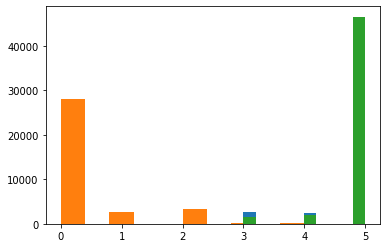

In [47]:
# count up number of stars and unks in same region as gals
#G12

# G12
# G12_stars = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_stars.fits')
# G12_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_galaxies.fits')
# G12_unks = Table.read('/suphys/fscu5535/HSC_work/mod_data/G12_HSC_unknowns.fits')


starcount = 0
starfilts = []
unkcount = 0
unkfilts = []
galfilts= []

G12galramin = np.min(G12_gals['ra'])
G12galramax = np.max(G12_gals['ra'])
G12galdecmin = np.min(G12_gals['dec'])
G12galdecmax = np.max(G12_gals['dec'])
G12galzmax = np.max(G12_gals['photoz_median'])

for i in range(len(G12_stars)):
    if (G12galramin <= G12_stars['ra'][i] <= G12galramax) and (G12galdecmin <= G12_stars['dec'][i] <= G12galdecmax) and (G12_stars['photoz_median'][i] <= G12galzmax):
        starcount += 1
        filtcount = 0
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G12_stars[j][i] == 0:
                filtcount += 1
        starfilts.append(filtcount)        
                                       
for i in range(len(G12_unks)):
    if (G12galramin <= G12_unks['ra'][i] <= G12galramax) and (G12galdecmin <= G12_unks['dec'][i] <= G12galdecmax) and (G12_unks['photoz_median'][i] <= G12galzmax):
        unkcount += 1
        filtcount = 0      
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G12_unks[j][i] >= 0:
                filtcount += 1
        unkfilts.append(filtcount)
        
for i in range(len(G12_gals)):
        filtcount = 0
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G12_gals[j][i] == 1:
                filtcount += 1
        galfilts.append(filtcount)  
                    
print("star count:",starcount)
print("star fraction:", starcount/(starcount+unkcount+len(G12_gals)))

print("gals count:",len(G12_gals))
print("gals fraction:", len(G12_gals)/(starcount+unkcount+len(G12_gals)))
                    
print("unk count:",unkcount)
print("unk fraction:", unkcount/(starcount+unkcount+len(G12_gals)))

#plt.figure(figsize=(8,6),dpi=100)
starfiltcounts, starfiltbins, starpatches = plt.hist(starfilts)
#plt.title("star filts")
print("stars:",starfiltcounts)

#plt.figure(figsize=(8,6),dpi=100)
unkfiltcounts, unkfiltbins, unkpatches = plt.hist(unkfilts)
#plt.title("unk filts")
print("unks:",unkfiltcounts)

galfiltcounts, galfiltbins, galpatches = plt.hist(galfilts)
print("gals:",galfiltcounts)

[0.08690858 0.         0.         0.         0.         0.14493515
 0.         0.         0.         0.76815628]


NameError: name 'galcount' is not defined

star count: 38086
star fraction: 0.3116132938423524
gals count: 47525
gals fraction: 0.3888416160756656
unk count: 36611
unk fraction: 0.299545090081982
stars: [ 3310.     0.     0.     0.     0.  5520.     0.     0.     0. 29256.]
unks: [30489.     0.  2672.     0.     0.  3071.     0.   263.     0.   116.]
gals: [ 2587.     0.     0.     0.     0.  3329.     0.     0.     0. 41609.]


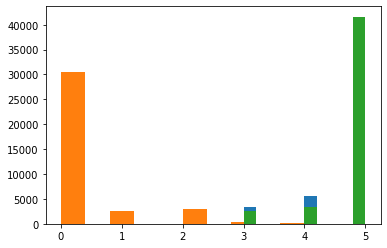

In [48]:
# count up number of stars and unks in same region as gals
#G15

# G15
# G15_stars = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_stars.fits')
# G15_gals = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_galaxies.fits')
# G15_unks = Table.read('/suphys/fscu5535/HSC_work/mod_data/G15_HSC_unknowns.fits')

# count up number of stars and unks in same region as gals
starcount = 0
starfilts = []
unkcount = 0
unkfilts = []
galfilts = []

G15galramin = np.min(G15_gals['ra'])
G15galramax = np.max(G15_gals['ra'])
G15galdecmin = np.min(G15_gals['dec'])
G15galdecmax = np.max(G15_gals['dec'])
G15galzmax = np.max(G15_gals['photoz_median'])

for i in range(len(G15_stars)):
    if (G15galramin <= G15_stars['ra'][i] <= G15galramax) and (G15galdecmin <= G15_stars['dec'][i] <= G15galdecmax) and (G15_stars['photoz_median'][i] <= G15galzmax):
        starcount += 1
        filtcount = 0
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G15_stars[j][i] == 0:
                filtcount += 1
        starfilts.append(filtcount)                                         

for i in range(len(G15_unks)):
    if (G15galramin <= G15_unks['ra'][i] <= G15galramax) and (G15galdecmin <= G15_unks['dec'][i] <= G15galdecmax) and (G15_unks['photoz_median'][i] <= G15galzmax):
        unkcount += 1
        filtcount = 0      
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G15_unks[j][i] >= 0:
                filtcount += 1
        unkfilts.append(filtcount)
        
for i in range(len(G15_gals)):
        filtcount = 0
        for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
            if G15_gals[j][i] == 1:
                filtcount += 1
        galfilts.append(filtcount)   
                    
print("star count:",starcount)
print("star fraction:", starcount/(starcount+unkcount+len(G15_gals)))

print("gals count:",len(G15_gals))
print("gals fraction:", len(G15_gals)/(starcount+unkcount+len(G15_gals)))
                    
print("unk count:",unkcount)
print("unk fraction:", unkcount/(starcount+unkcount+len(G15_gals)))                    

#plt.figure(figsize=(8,6),dpi=100)
starfiltcounts, starfiltbins, starpatches = plt.hist(starfilts)
#plt.title("star filts")
print("stars:", starfiltcounts)

#plt.figure(figsize=(8,6),dpi=100)
unkfiltcounts, unkfiltbins, unkpatches = plt.hist(unkfilts)
#plt.title("unks filts")
print("unks:", unkfiltcounts)

galfiltcounts, galfiltbins, galpatches = plt.hist(galfilts)
print("gals:",galfiltcounts)

#### G09_stars.info()

In [41]:

for j in ['i_extendedness_value','g_extendedness_value','r_extendedness_value','z_extendedness_value','y_extendedness_value',]:
    print(G09_unks[j][150])
    print(G09_unks[j][150].mask)
                 
            
            
            
            

--
True
--
True
--
True
--
True
--
True
